<a href="https://colab.research.google.com/github/Dev-180Memes/credit-card-fraud/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dhanushnarayananr_credit_card_fraud_path = kagglehub.dataset_download('dhanushnarayananr/credit-card-fraud')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


In [ ]:
df=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [ ]:
y=df['fraud']
x=df.drop("fraud",axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
model1 = logreg.fit(x_train, y_train)
model1.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95706

In [ ]:
tree=DecisionTreeClassifier(max_depth=4,random_state=42)

In [ ]:
model2 = tree.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9919866666666667

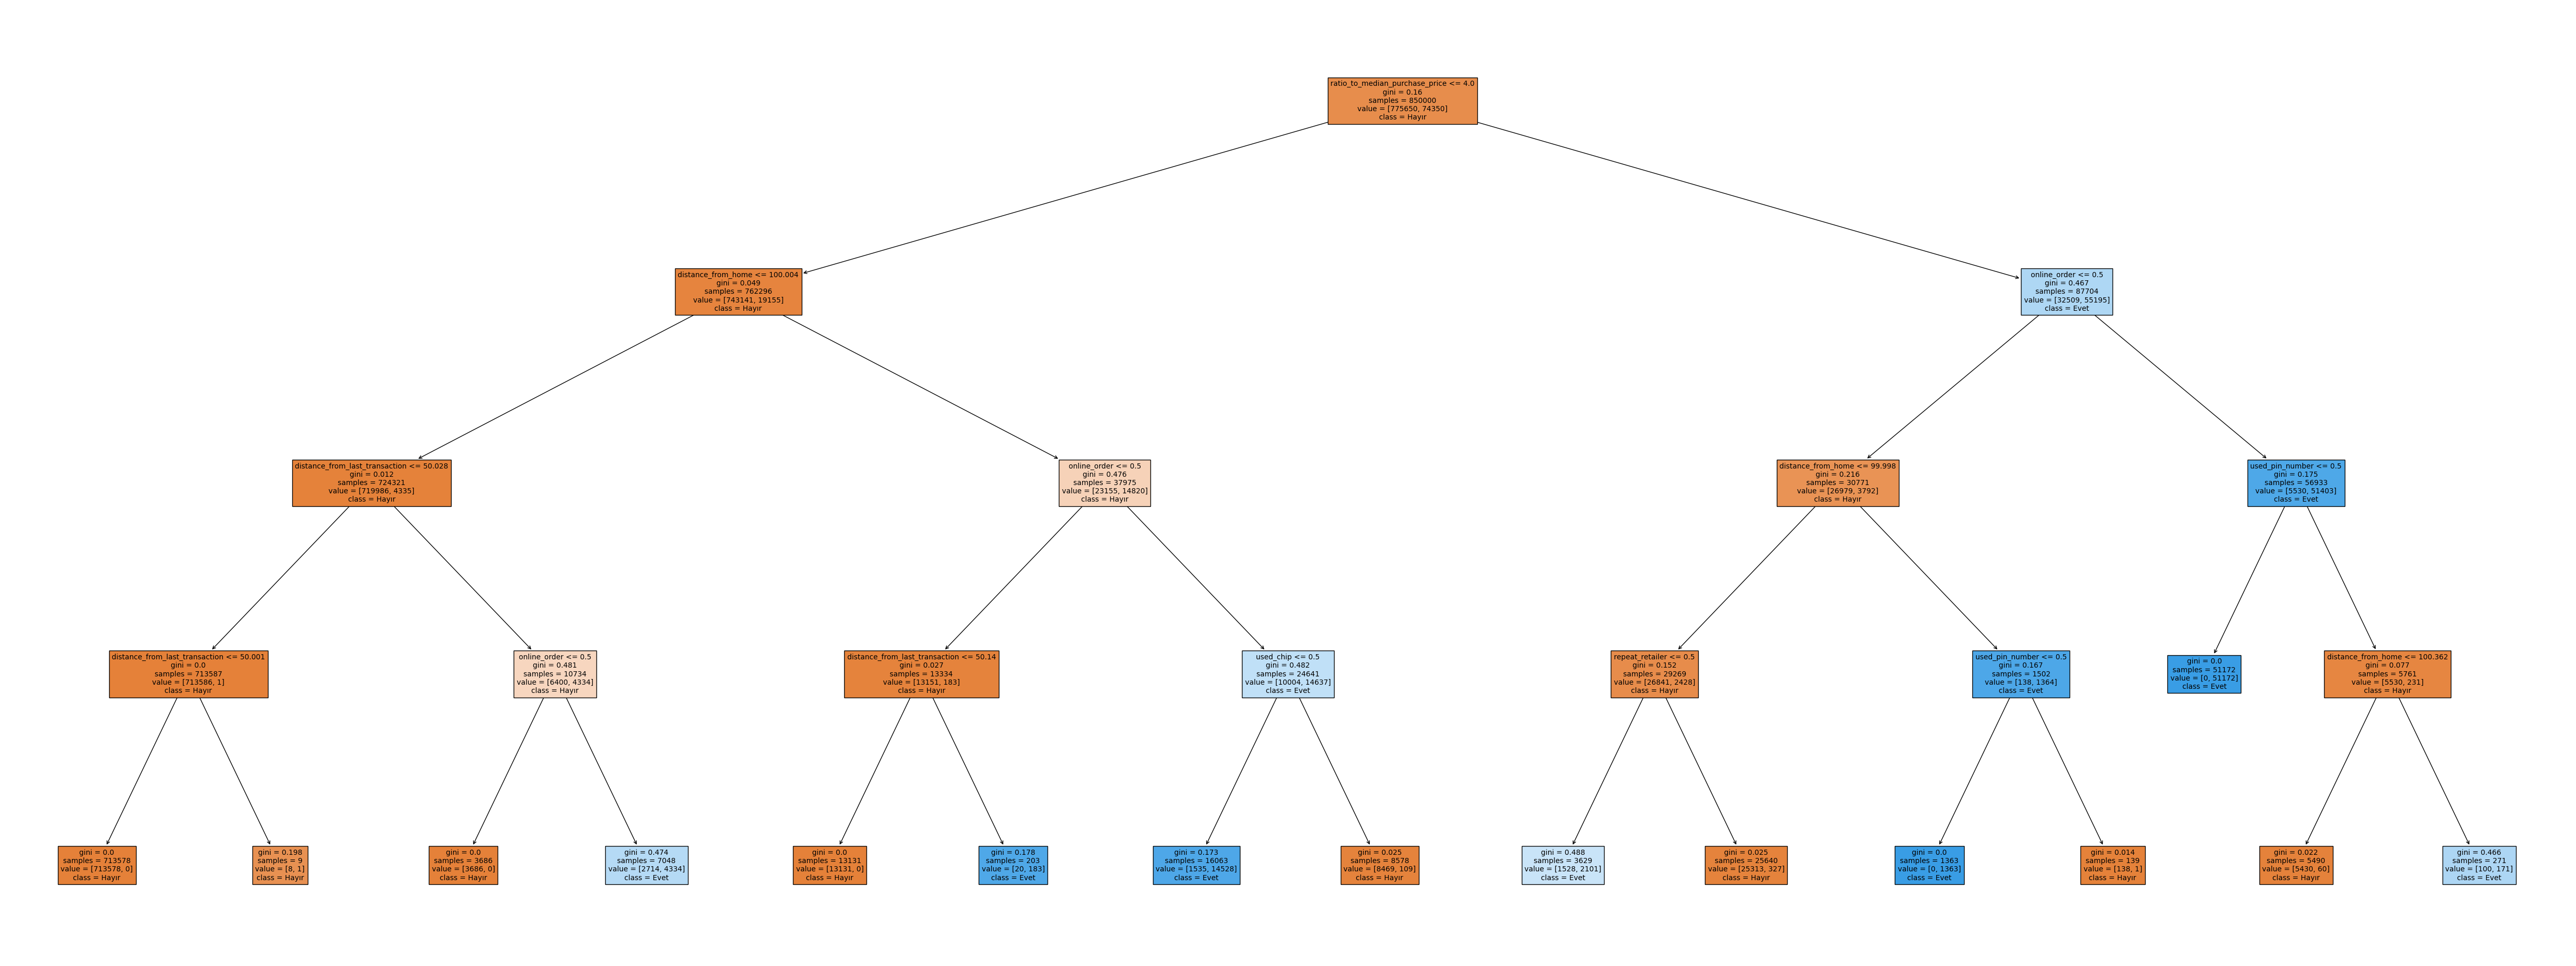

In [ ]:
plt.figure(figsize=(64,24))
plot_tree(tree,feature_names=x.columns,class_names=['Hayır','Evet'],filled=True,fontsize=10)
plt.savefig('tree.png')
plt.show()

In [ ]:
df.sample()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
402759,14.368115,2.394424,0.27392,1.0,0.0,0.0,0.0,0.0


In [ ]:
model2.predict([
    [10,10,1,1,1,0,0],
    [13000,12590,10,0,0,0,1]

])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0., 1.])